<a href="https://colab.research.google.com/github/Ali-Asgar-Lakdawala/Bike-Sharing-Demand-Prediction/blob/main/Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of the day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

---
#Initializing
---

In [1]:
#importing pandas ,numpy,matplotlib.pyplot & seaborn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")
#to display all the graph in the workbook 
%matplotlib inline
sns.set_style("whitegrid",{'grid.linestyle': '--'})

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/Ali-Asgar-Lakdawala/Bike-Sharing-Demand-Prediction/main/SeoulBikeData.csv', encoding = "ISO-8859-1")

In [3]:
# Set the display figure size using rcParams method 
sns.set(rc={'figure.figsize':(8,6)})
plt.rcParams['figure.figsize'] = [8,6]

---
# Functions
----

In [239]:
import math
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
def train_and_score (model,X_test,X_train,Y_test,Y_train,graph=True,load_prev_model=False):
  '''train the model and gives mse,rmse,r2,adj r2 score of the model
  '''

  try:
    print("The best parameters found out to be :" ,model.best_params_, " \nwhere negative mean squared error is: ", model.best_score_)
  except:
    pass

  model.fit(X_train,Y_train)
  Y_pred = model.predict(X_test)
  MSE  = mean_squared_error(Y_test,Y_pred)
  print("MSE :" , MSE)

  RMSE = np.sqrt(MSE)
  print("RMSE :" ,RMSE)

  r2 = r2_score(Y_test,Y_pred)
  print("R2 :" ,r2)
  print("Adjusted R2 : ",1-(1-r2_score(Y_test,Y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
  if graph ==True:
    plt.figure(figsize=(20,10))
    plt.plot((Y_pred)[:100])
    plt.plot((np.array(Y_test)[:100]))
    plt.legend(["Predicted","Actual"])
    plt.show()

In [5]:
import torch
def save_model (model_name):
  '''save the model in the drive loacation
  '''
  from google.colab import drive
  drive.mount('/content/drive')

  model_save_name = 'model_name.pt'
  path = F"/content/drive/MyDrive/Colab Notebooks/capstone ml 1/model_name" 
  torch.save(model_name, path)

In [6]:
import torch
def load_model(model_name):
  '''
  load the model from drive
  '''

  from google.colab import drive
  drive.mount('/content/drive')

  model_save_name = 'model_name.pt'
  path = F"/content/drive/MyDrive/Colab Notebooks/capstone ml 1/model_name"
  return model_name


---
#EDA
---

In [7]:
og_df=df.copy()

In [8]:
print ('Shape dataset')
print (df.shape)
print ('\n')
print ('Info Dataset')
print (df.info())
print ('\n')
print ('See if any missing value of Dataset')
print (df.isna().sum())

Shape dataset
(8760, 14)


Info Dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Function

In [9]:
df.describe()

Rented Bike Count         Hour  ...  Rainfall(mm)  Snowfall (cm)
count        8760.000000  8760.000000  ...   8760.000000    8760.000000
mean          704.602055    11.500000  ...      0.148687       0.075068
std           644.997468     6.922582  ...      1.128193       0.436746
min             0.000000     0.000000  ...      0.000000       0.000000
25%           191.000000     5.750000  ...      0.000000       0.000000
50%           504.500000    11.500000  ...      0.000000       0.000000
75%          1065.250000    17.250000  ...      0.000000       0.000000
max          3556.000000    23.000000  ...     35.000000       8.800000

[8 rows x 10 columns]

In [10]:
df.head()

Date  Rented Bike Count  Hour  ...  Seasons     Holiday  Functioning Day
0  01/12/2017                254     0  ...   Winter  No Holiday              Yes
1  01/12/2017                204     1  ...   Winter  No Holiday              Yes
2  01/12/2017                173     2  ...   Winter  No Holiday              Yes
3  01/12/2017                107     3  ...   Winter  No Holiday              Yes
4  01/12/2017                 78     4  ...   Winter  No Holiday              Yes

[5 rows x 14 columns]

In [11]:
df.Seasons.value_counts()

Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: Seasons, dtype: int64

In [12]:
df.Holiday.value_counts()

No Holiday    8328
Holiday        432
Name: Holiday, dtype: int64

In [13]:
df['Functioning Day'].value_counts()

Yes    8465
No      295
Name: Functioning Day, dtype: int64

good news it does not have any null values

In [14]:
# create new day,month, hour info from Pickup time
df['Date']=pd.to_datetime(df['Date'])
df['month'] = df['Date'].apply(lambda x : x.month)
df['day_of_week'] = df['Date'].dt.day_name()
df['weekdays_weekend']=df['day_of_week'].apply(lambda x : 1 if x=='Saturday' or x=='Sunday' else 0 )
df=df.drop(columns=['Date','day_of_week'],axis=1)


In [15]:
df['weekdays_weekend'].value_counts()

0    6216
1    2544
Name: weekdays_weekend, dtype: int64

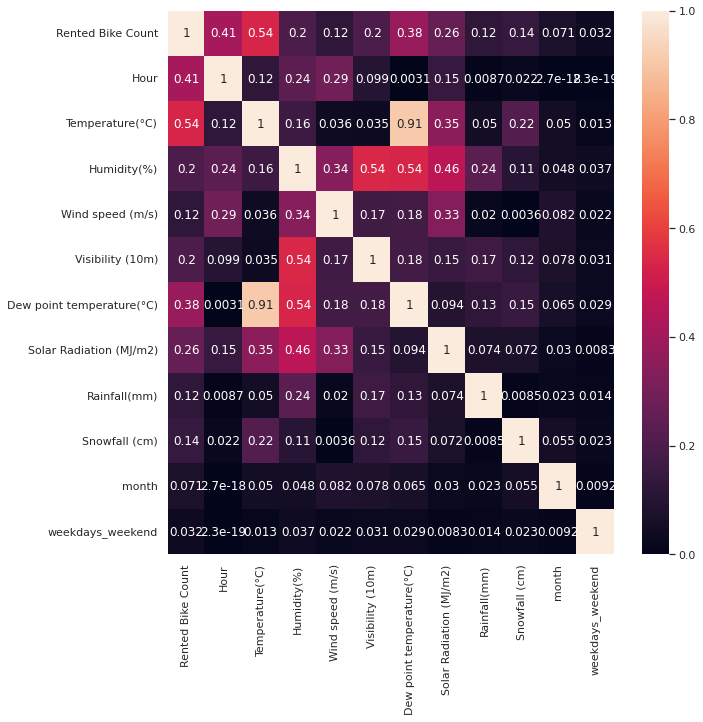

In [16]:
plt.figure(figsize=(10,10))
sns.heatmap(abs(df.corr()),annot=True)


In [17]:
#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):
 
   # Calculating VIF
   vif = pd.DataFrame()
   vif["variables"] = X.columns
   vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
 
   return(vif)

In [18]:
calc_vif(df[[i for i in df.describe().columns if i not in ['Rented Bike Count','Dew point temperature(°C)']]])

variables       VIF
0                     Hour  3.961874
1          Temperature(°C)  3.236809
2              Humidity(%)  6.114153
3         Wind speed (m/s)  4.616621
4         Visibility (10m)  5.404128
5  Solar Radiation (MJ/m2)  2.272068
6             Rainfall(mm)  1.081252
7            Snowfall (cm)  1.125304
8                    month  4.580307
9         weekdays_weekend  1.399708

we can remove dew point tem as it is coorelated to temprature 

In [19]:
numeric_features=df.describe().columns

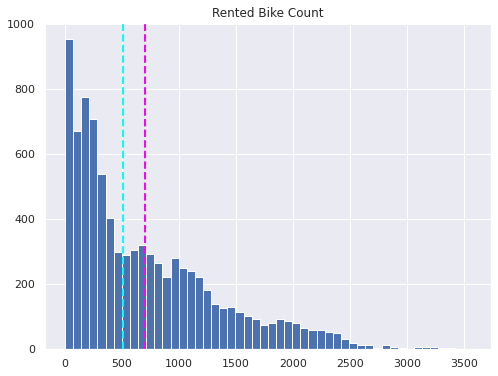

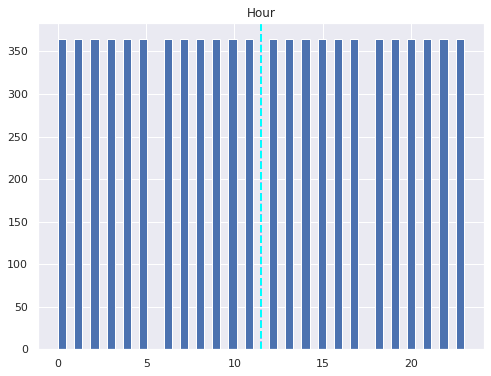

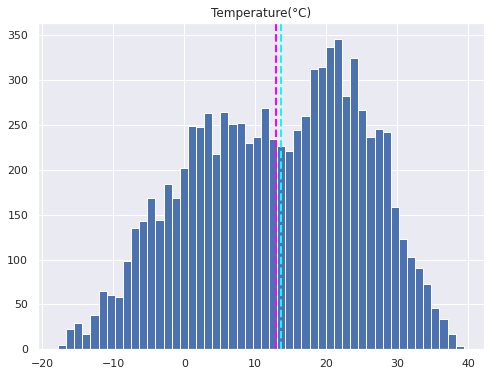

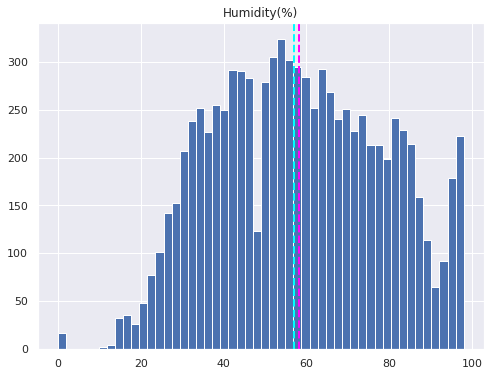

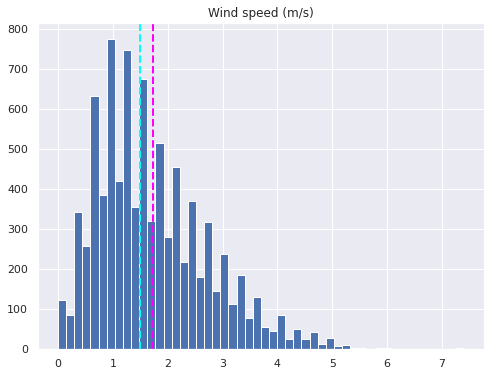

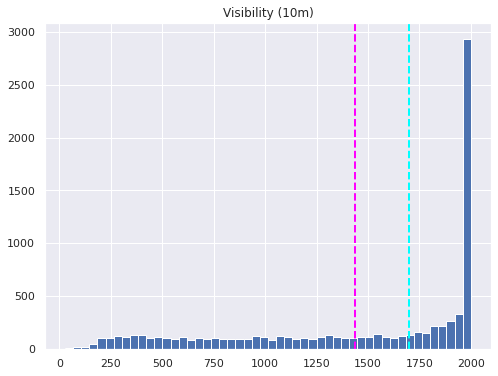

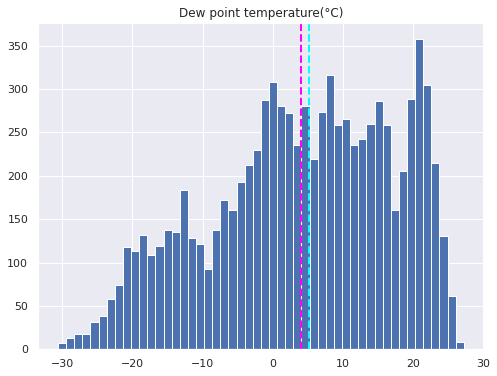

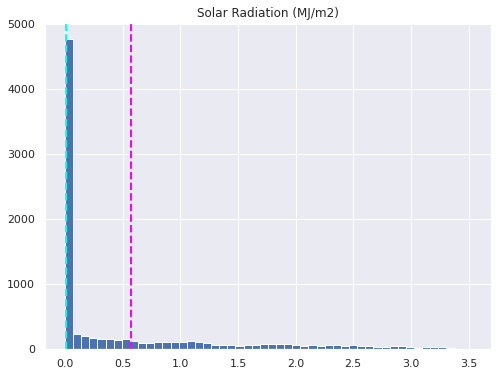

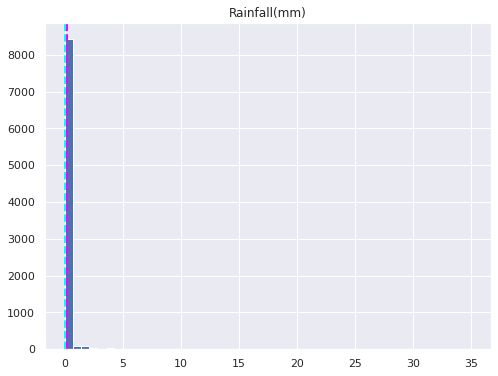

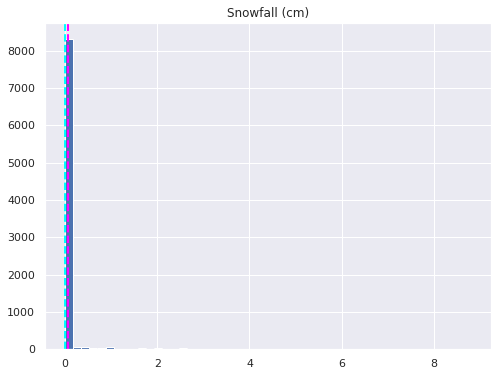

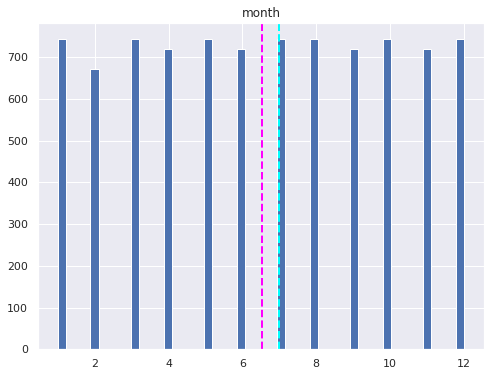

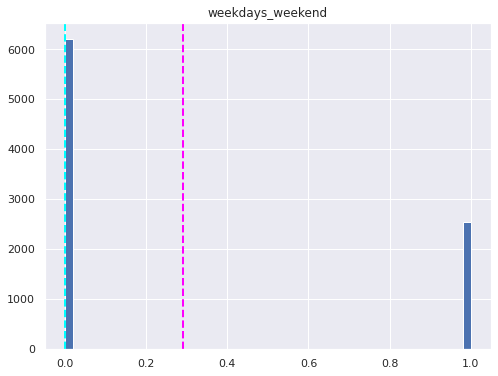

In [20]:
#plotting histogram of all the numeric features of the dataset
for col in numeric_features[:]:
  fig=plt.figure()
  ax=fig.gca()
  feature=df[col]
  feature.hist(bins=50,ax=ax)
  ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
  ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
  ax.set_title(col)
plt.show()

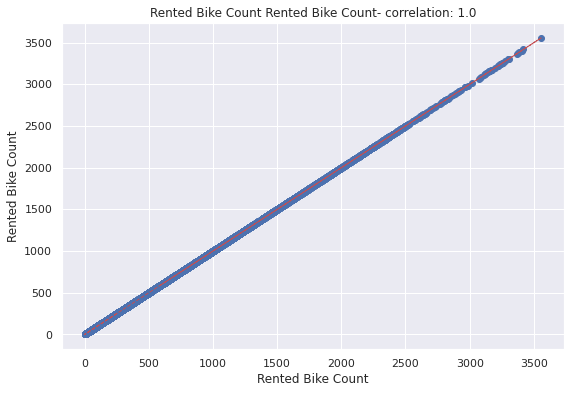

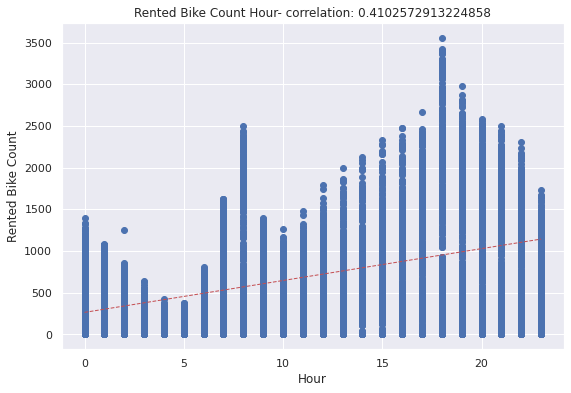

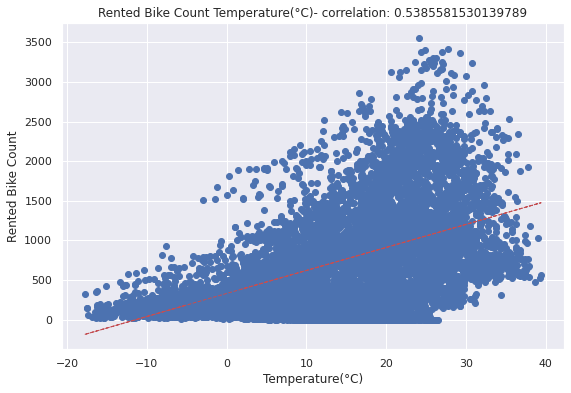

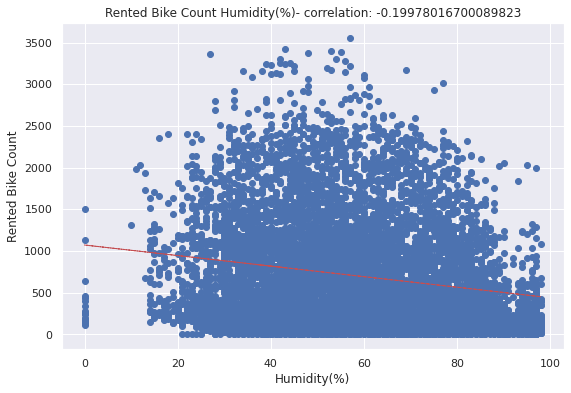

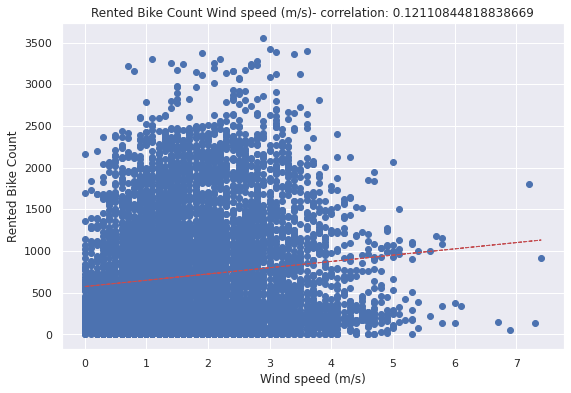

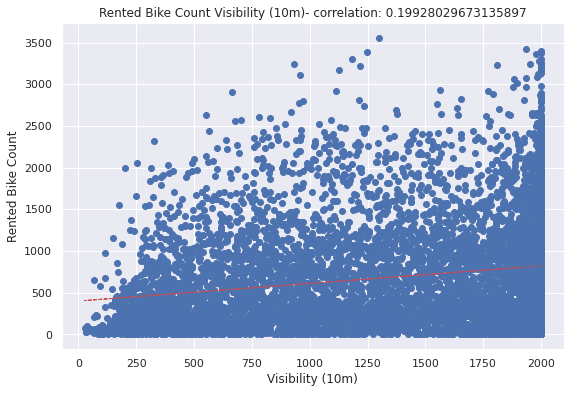

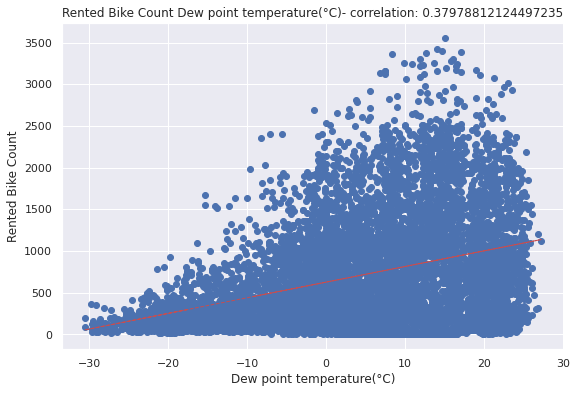

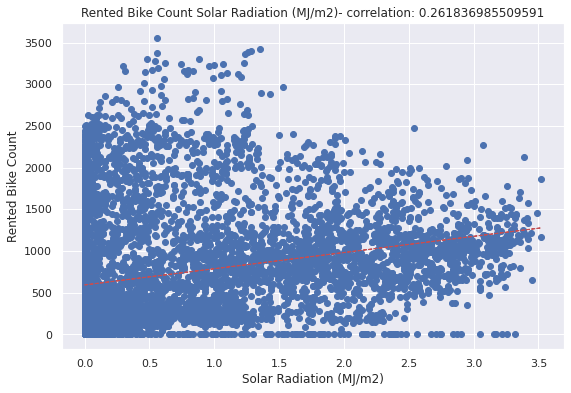

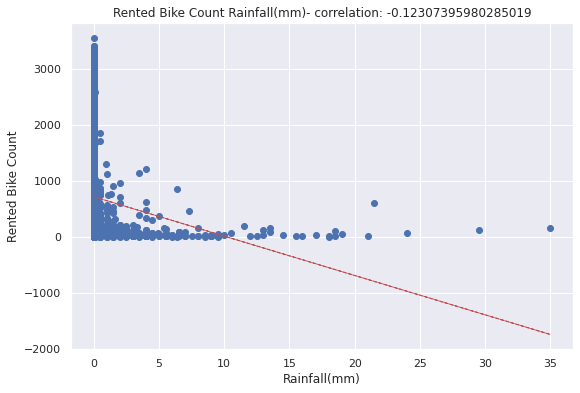

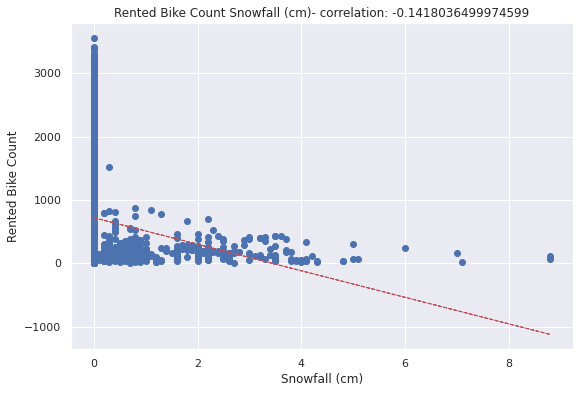

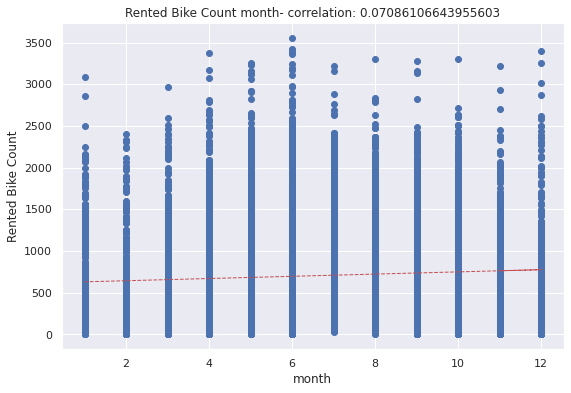

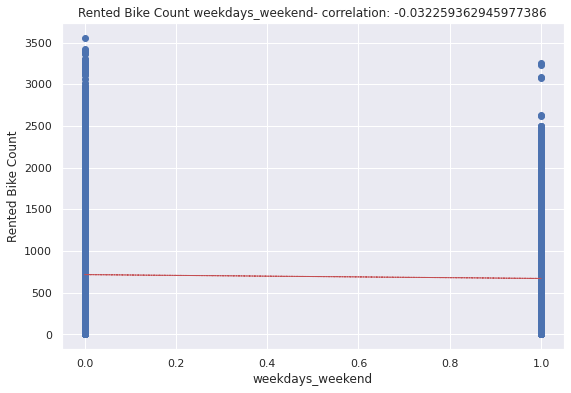

In [21]:
for col in numeric_features:
   fig = plt.figure(figsize=(9, 6))
   ax = fig.gca()
   feature = df[col]
   label = df['Rented Bike Count']
   correlation = feature.corr(label)
   plt.scatter(x=feature, y=label)
   plt.xlabel(col)
   plt.ylabel('Rented Bike Count')
   ax.set_title('Rented Bike Count ' + col + '- correlation: ' + str(correlation))
   z = np.polyfit(df[col], df['Rented Bike Count'], 1)
   y_hat = np.poly1d(z)(df[col])
 
   plt.plot(df[col], y_hat, "r--", lw=1)
 
plt.show()

In [22]:
# sns.pairplot(df)

In [23]:
numeric_features= df.select_dtypes(exclude='object')
categorical_features=df.select_dtypes(include='object')

In [24]:
numeric_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented Bike Count          8760 non-null   int64  
 1   Hour                       8760 non-null   int64  
 2   Temperature(°C)            8760 non-null   float64
 3   Humidity(%)                8760 non-null   int64  
 4   Wind speed (m/s)           8760 non-null   float64
 5   Visibility (10m)           8760 non-null   int64  
 6   Dew point temperature(°C)  8760 non-null   float64
 7   Solar Radiation (MJ/m2)    8760 non-null   float64
 8   Rainfall(mm)               8760 non-null   float64
 9   Snowfall (cm)              8760 non-null   float64
 10  month                      8760 non-null   int64  
 11  weekdays_weekend           8760 non-null   int64  
dtypes: float64(6), int64(6)
memory usage: 821.4 KB


In [25]:
categorical_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Seasons          8760 non-null   object
 1   Holiday          8760 non-null   object
 2   Functioning Day  8760 non-null   object
dtypes: object(3)
memory usage: 205.4+ KB


In [26]:
# categorical_features = pd.get_dummies(categorical_features,drop_first=True))
categorical_feature = pd.get_dummies(categorical_features)

In [27]:
categorical_feature

Seasons_Autumn  Seasons_Spring  ...  Functioning Day_No  Functioning Day_Yes
0                  0               0  ...                   0                    1
1                  0               0  ...                   0                    1
2                  0               0  ...                   0                    1
3                  0               0  ...                   0                    1
4                  0               0  ...                   0                    1
...              ...             ...  ...                 ...                  ...
8755               1               0  ...                   0                    1
8756               1               0  ...                   0                    1
8757               1               0  ...                   0                    1
8758               1               0  ...                   0                    1
8759               1               0  ...                   0                    1

[8760 rows x 8 columns]

In [28]:
df= pd.concat([categorical_feature,numeric_features],axis=1)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Seasons_Autumn             8760 non-null   uint8  
 1   Seasons_Spring             8760 non-null   uint8  
 2   Seasons_Summer             8760 non-null   uint8  
 3   Seasons_Winter             8760 non-null   uint8  
 4   Holiday_Holiday            8760 non-null   uint8  
 5   Holiday_No Holiday         8760 non-null   uint8  
 6   Functioning Day_No         8760 non-null   uint8  
 7   Functioning Day_Yes        8760 non-null   uint8  
 8   Rented Bike Count          8760 non-null   int64  
 9   Hour                       8760 non-null   int64  
 10  Temperature(°C)            8760 non-null   float64
 11  Humidity(%)                8760 non-null   int64  
 12  Wind speed (m/s)           8760 non-null   float64
 13  Visibility (10m)           8760 non-null   int64

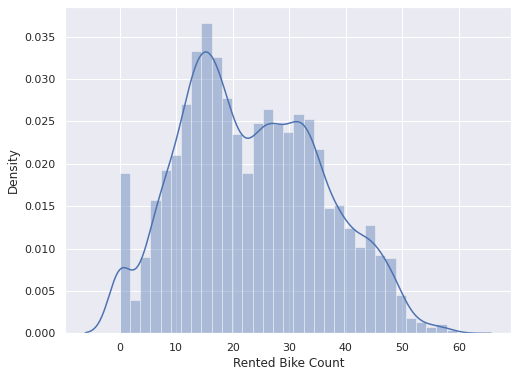

In [30]:
sns.distplot(np.sqrt(df['Rented Bike Count']))

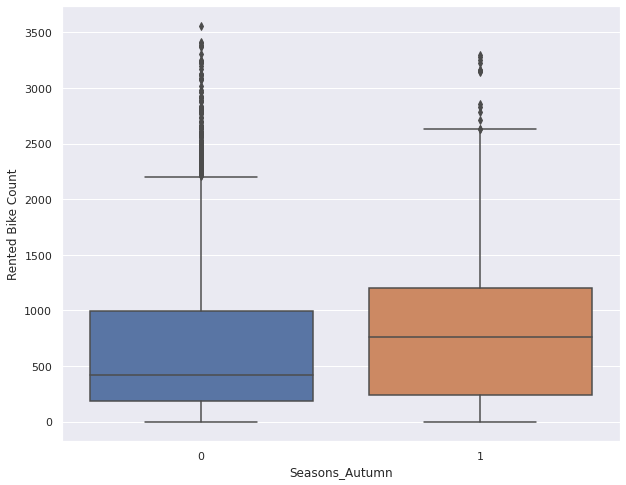

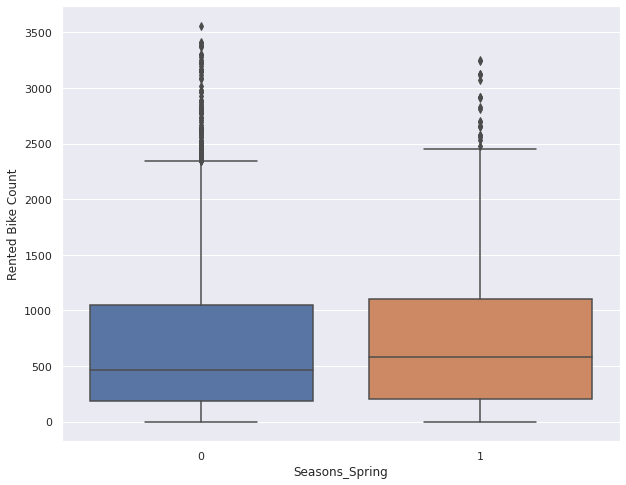

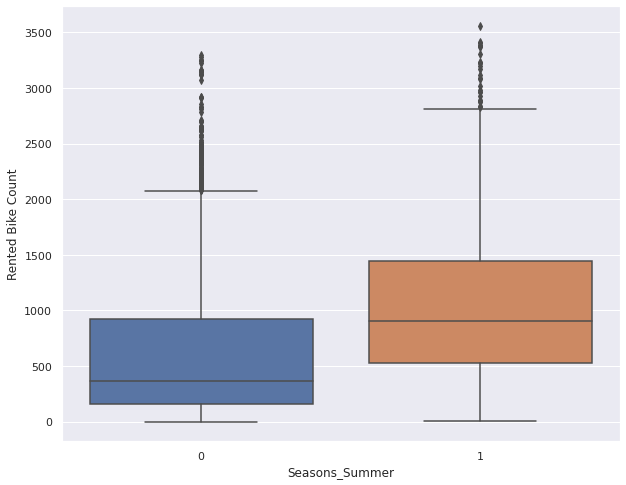

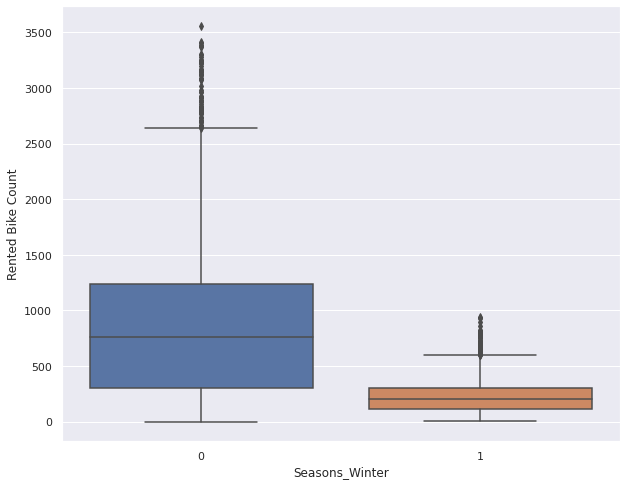

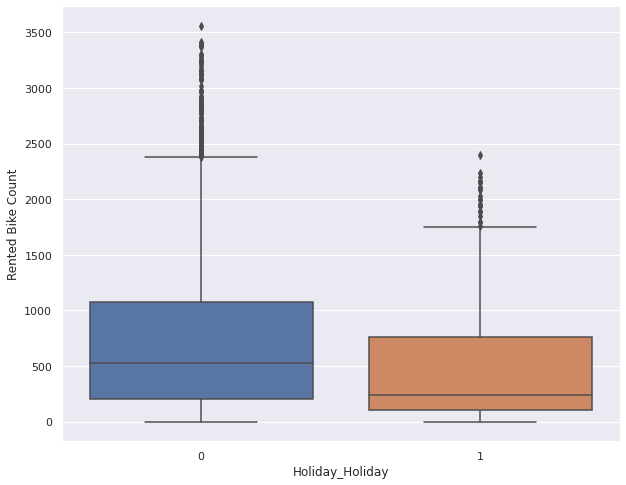

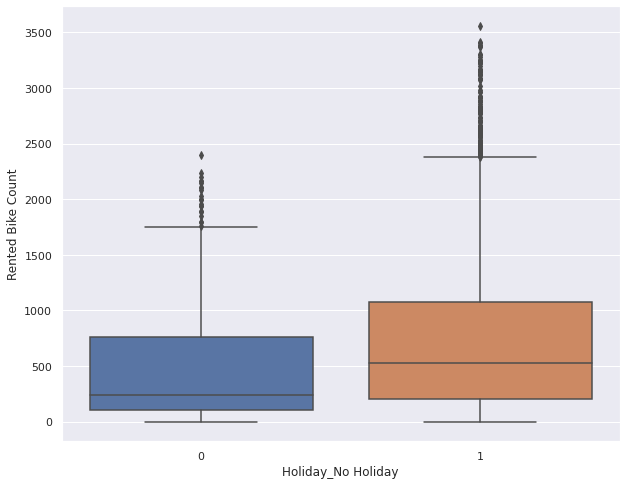

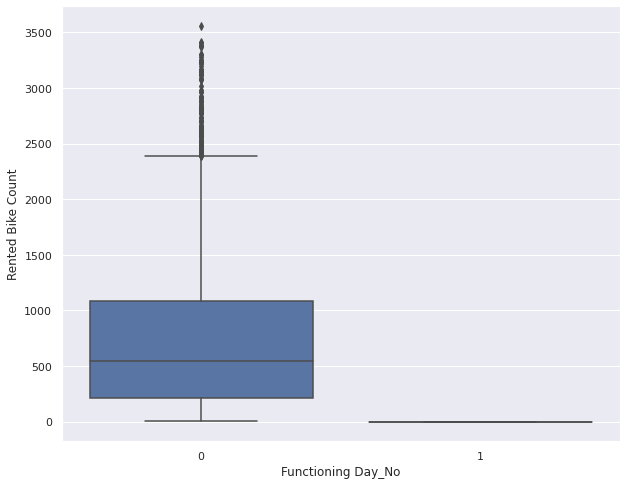

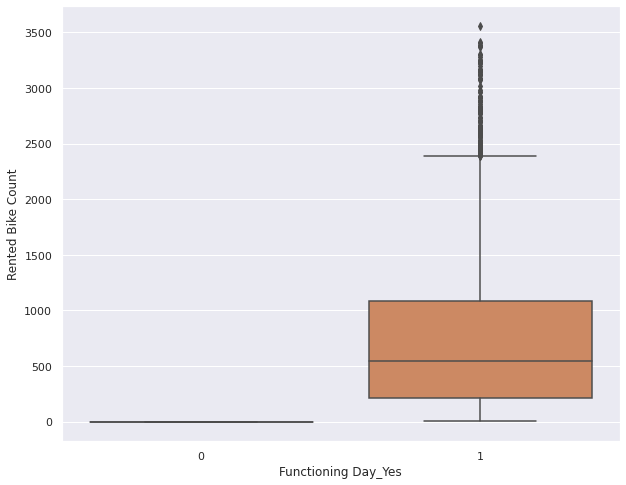

In [31]:
for col in categorical_feature.columns:
  plt.figure(figsize=(10,8))
  sns.boxplot(x=df[col],y=df["Rented Bike Count"])
  plt.show()

since their are no bike booking when it is not a functional day we can drop that column

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Seasons_Autumn             8760 non-null   uint8  
 1   Seasons_Spring             8760 non-null   uint8  
 2   Seasons_Summer             8760 non-null   uint8  
 3   Seasons_Winter             8760 non-null   uint8  
 4   Holiday_Holiday            8760 non-null   uint8  
 5   Holiday_No Holiday         8760 non-null   uint8  
 6   Functioning Day_No         8760 non-null   uint8  
 7   Functioning Day_Yes        8760 non-null   uint8  
 8   Rented Bike Count          8760 non-null   int64  
 9   Hour                       8760 non-null   int64  
 10  Temperature(°C)            8760 non-null   float64
 11  Humidity(%)                8760 non-null   int64  
 12  Wind speed (m/s)           8760 non-null   float64
 13  Visibility (10m)           8760 non-null   int64

---
#linear reg
---

In [215]:
import math
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
def score_metrix (model,X_test,X_train,Y_test,Y_train,graph=True):
  model.fit(X_train,Y_train)
  Y_pred = model.predict(X_test)
  MSE  = mean_squared_error(Y_test**2,Y_pred**2)
  print("MSE :" , MSE)

  RMSE = np.sqrt(MSE)
  print("RMSE :" ,RMSE)

  r2 = r2_score(Y_test**2,Y_pred**2)
  print("R2 :" ,r2)
  print("Adjusted R2 : ",1-(1-r2_score(Y_test**2,Y_pred**2))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
  if graph ==True:
    plt.figure(figsize=(20,10))
    plt.plot((Y_pred)[:100])
    plt.plot((np.array(Y_test)[:100]))
    plt.legend(["Predicted","Actual"])
    plt.show()

In [216]:
df[[i for i in df.columns if i not in [['Rented Bike Count','Dew point temperature(°C)','Functioning Day_No','Functioning Day_Yes']]]]

Seasons_Autumn  Seasons_Spring  ...  month  weekdays_weekend
0                  0               0  ...      1                 0
1                  0               0  ...      1                 0
2                  0               0  ...      1                 0
3                  0               0  ...      1                 0
4                  0               0  ...      1                 0
...              ...             ...  ...    ...               ...
8755               1               0  ...     11                 0
8756               1               0  ...     11                 0
8757               1               0  ...     11                 0
8758               1               0  ...     11                 0
8759               1               0  ...     11                 0

[8760 rows x 20 columns]

In [217]:
# X=df[[i for i in df.columns if i not in ['Rented Bike Count','Dew point temperature(°C)','Functioning Day_No','Functioning Day_Yes']]]
# Y=np.sqrt(df['Rented Bike Count'])

In [218]:
X=df[[i for i in df.columns if i not in ['Rented Bike Count','Dew point temperature(°C)']]]
Y=np.sqrt(df['Rented Bike Count'])

In [219]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.25, random_state=1)

In [220]:
#STANDARD SCALER
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
X_train = std.fit_transform(X_train)
X_test = std.transform(X_test)

In [240]:
# importing the Linear Regression model
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

In [222]:
# training and evaluating the model
score_metrix (regressor,X_test,X_train,Y_test,Y_train,graph=False)

MSE : 173905.61189493933
RMSE : 417.0199178635708
R2 : 0.577009118250819
Adjusted R2 :  0.5735020542842205


##lasso reg

In [223]:
# importing the Linear Regression model
from sklearn.linear_model import Lasso
lasso  = Lasso(alpha=0.0001 , max_iter= 3000)

In [224]:
# training and evaluating the model
score_metrix (lasso,X_test,X_train,Y_test,Y_train,graph=False)

MSE : 173683.27640149923
RMSE : 416.7532560178735
R2 : 0.5775499052063956
Adjusted R2 :  0.5740473249639797


In [225]:
#finding the coefficient of lasso 
lasso.coef_

array([ 2.29613735e+00,  1.15443381e+00,  1.09672453e+00, -1.11887589e+00,
       -6.16399392e-01,  0.00000000e+00, -5.01704746e+00,  1.87707114e-15,
        3.39523784e+00,  5.71570044e+00, -3.43164465e+00,  3.32058760e-02,
       -5.58606061e-03, -7.51704509e-01, -1.69206664e+00,  6.40588647e-02,
        3.24680817e-01, -3.19998337e-01])

In [226]:
### Cross validation
from sklearn.model_selection import GridSearchCV
lasso = Lasso()
#setting the parameters of the 
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.0014]}
lasso_grid = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)


In [227]:
score_metrix (lasso_grid,X_test,X_train,Y_test,Y_train,graph=False)

MSE : 174015.20753267937
RMSE : 417.15130052857245
R2 : 0.5767425486160705
Adjusted R2 :  0.5732332744912844


##Ridge reg

In [228]:
from sklearn.linear_model import Ridge
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,60,100,0.5,1.5,1.6,1.7,1.8,1.9]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)

In [229]:
score_metrix (ridge_regressor,X_test,X_train,Y_test,Y_train,graph=False)

MSE : 174029.8501801073
RMSE : 417.16885092262976
R2 : 0.5767069332826767
Adjusted R2 :  0.5731973638672405


In [230]:
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 30}

Using  {'alpha': 30}  the negative mean squared error is:  -54.74869500581883


## Elastic Net

In [233]:
from sklearn.linear_model import ElasticNet
#a * L1 + b * L2
#alpha = a + b and l1_ratio = a / (a + b)
elasticnet = ElasticNet(alpha=0.1, l1_ratio=0.5)

In [234]:
score_metrix (elasticnet,X_test,X_train,Y_test,Y_train,graph=False)

MSE : 179596.46262864134
RMSE : 423.78822851589604
R2 : 0.5631672534396602
Adjusted R2 :  0.5595454250480959


In [235]:
elastic = ElasticNet()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100],'l1_ratio':[0.1,0.2,0.3,0.4,0.5]}
elastic_regressor = GridSearchCV(elastic, parameters, scoring='neg_mean_squared_error',cv=5)

MSE : 173784.3760096859
RMSE : 416.8745326950135
R2 : 0.5838227237655284
Adjusted R2 :  0.5826792050703336


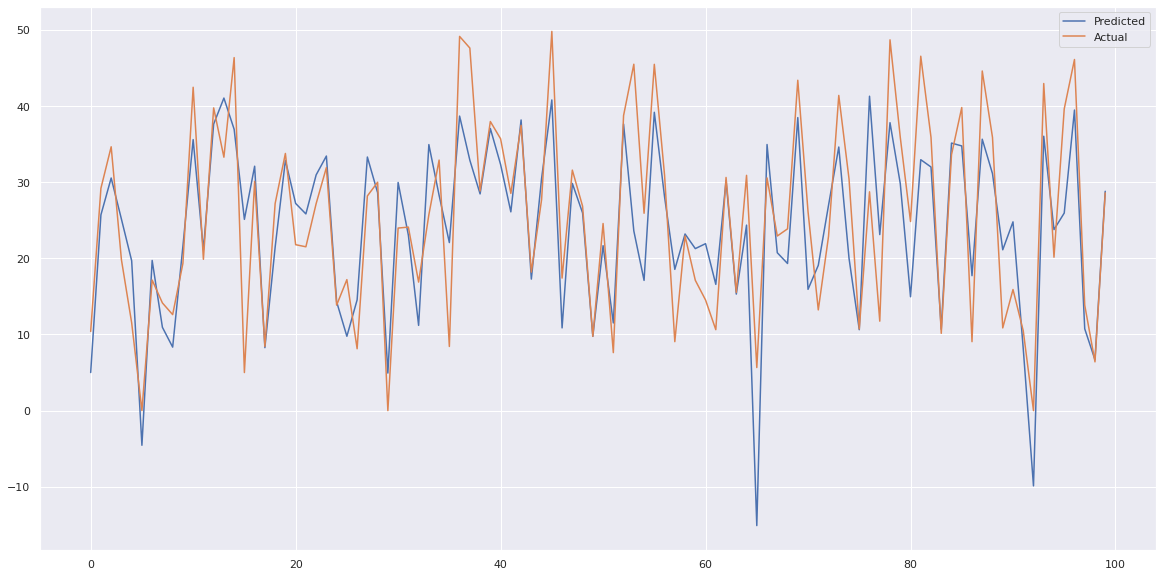

In [236]:
score_metrix(elastic_regressor,X_train, X_test, Y_train, Y_test)

In [237]:
print("The best parameters found out to be :" ,elastic_regressor.best_params_, " \nwhere negative mean squared error is: ", elastic_regressor.best_score_)


The best parameters found out to be : {'alpha': 0.01, 'l1_ratio': 0.5}  
where negative mean squared error is:  -52.46459665784348


---
# Polynominal regg
---

In [57]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

MSE : 45.18942780765914
RMSE : 6.722308220221619
R2 : 0.7095913871333768
Adjusted R2 :  0.7087934394869717


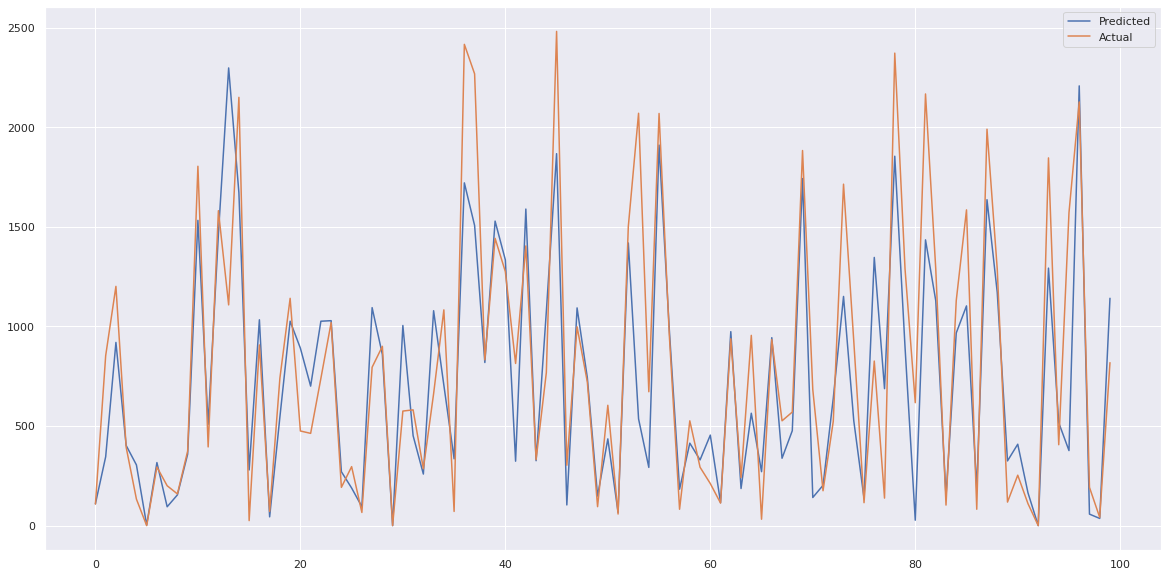

In [66]:
pipe=make_pipeline(PolynomialFeatures(degree=2),LinearRegression())
score_metrix(pipe,X_train, X_test, Y_train, Y_test)

---
# KNN
---

In [175]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

In [176]:
# Data for all the independent variables
X = df.drop(columns=['Rented Bike Count'],axis=1)

# Data for the dependent variable
Y = df['Rented Bike Count']

In [177]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.25, random_state=1)

MSE : 226536.51147565627
RMSE : 475.95851865016164
R2 : 0.4574923794740725
Adjusted R2 :  0.45591869324659273


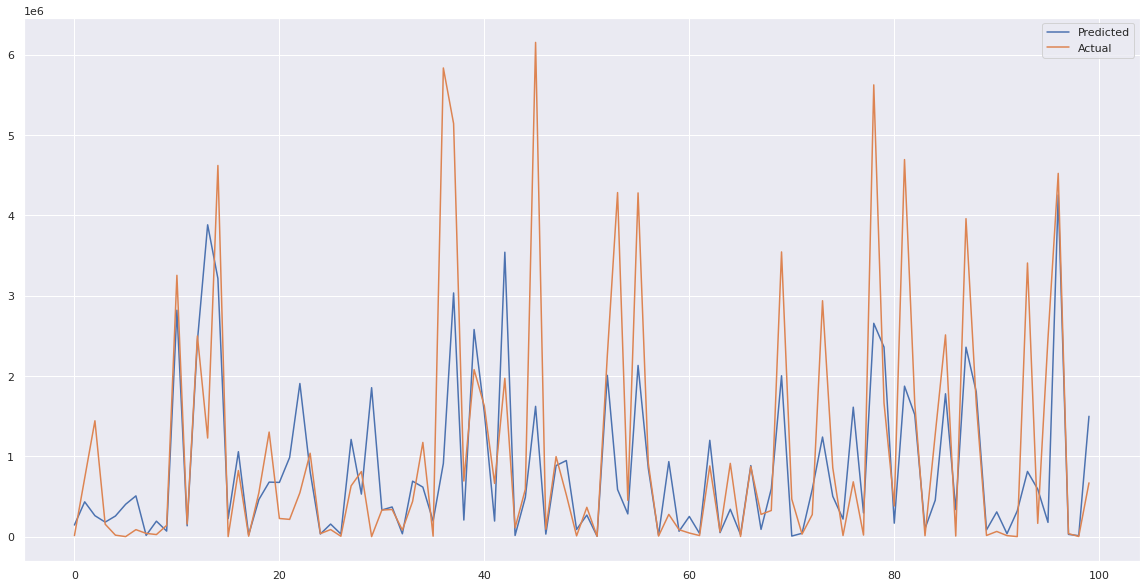

In [178]:
knn_model = KNeighborsRegressor()

param_dict={'n_neighbors':[3,5,7,9,11,13,15,21,23,25]}

knn_grid= GridSearchCV(knn_model,param_grid=param_dict)

train_and_score(knn_grid,X_train, X_test, Y_train, Y_test)

In [179]:
knn_grid.best_params_


{'n_neighbors': 9}

---
# Desision Tree
---

MSE : 95331.0644498317
RMSE : 308.75729052093925
R2 : 0.7717020157148502
Adjusted R2 :  0.7710397772871529


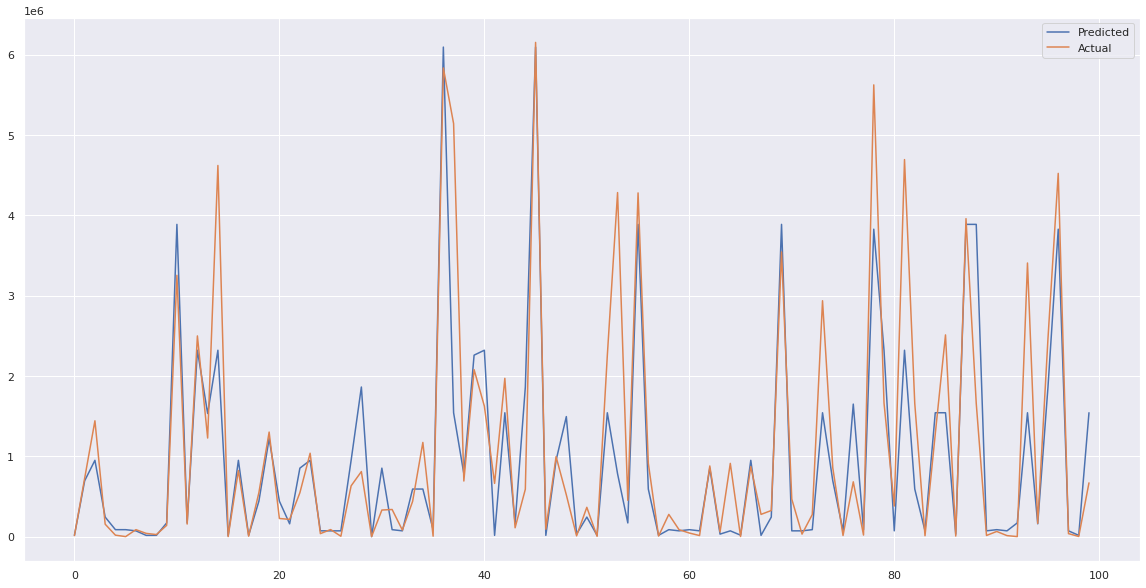

In [173]:
from sklearn.tree import DecisionTreeRegressor
DecisionTree = DecisionTreeRegressor(max_depth=22,max_leaf_nodes=50)
train_and_score(DecisionTree,X_train, X_test, Y_train, Y_test)

---
# random forest
---

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Seasons_Autumn             8760 non-null   uint8  
 1   Seasons_Spring             8760 non-null   uint8  
 2   Seasons_Summer             8760 non-null   uint8  
 3   Seasons_Winter             8760 non-null   uint8  
 4   Holiday_Holiday            8760 non-null   uint8  
 5   Holiday_No Holiday         8760 non-null   uint8  
 6   Functioning Day_No         8760 non-null   uint8  
 7   Functioning Day_Yes        8760 non-null   uint8  
 8   Rented Bike Count          8760 non-null   int64  
 9   Hour                       8760 non-null   int64  
 10  Temperature(°C)            8760 non-null   float64
 11  Humidity(%)                8760 non-null   int64  
 12  Wind speed (m/s)           8760 non-null   float64
 13  Visibility (10m)           8760 non-null   int64

In [109]:
from sklearn.ensemble import RandomForestRegressor

In [110]:
# rfc=RandomForestRegressor(max_leaf_nodes=60,max_depth= 17, n_estimators= 100)
rfc=RandomForestRegressor(max_leaf_nodes=60)

In [111]:
rfc.fit(X_train,Y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=60,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [112]:
rfc.score(X_train,Y_train)


0.8864332100822236

In [113]:
rfc.score(X_test,Y_test)

0.8485799409494611

In [114]:
train_class_preds_rfc = rfc.predict(X_train)
Y_pred_rf = rfc.predict(X_test)

In [115]:
pd.DataFrame(np.isnan(Y_pred_rf)).value_counts()

False    2190
dtype: int64

In [116]:
MSE  = mean_squared_error(Y_test,Y_pred_rf)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(Y_test,Y_pred_rf)
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(Y_test,Y_pred_rf))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 62253.81954679168
RMSE : 249.5071532978397
R2 : 0.8485799409494611
Adjusted R2 :  0.8472541431974057


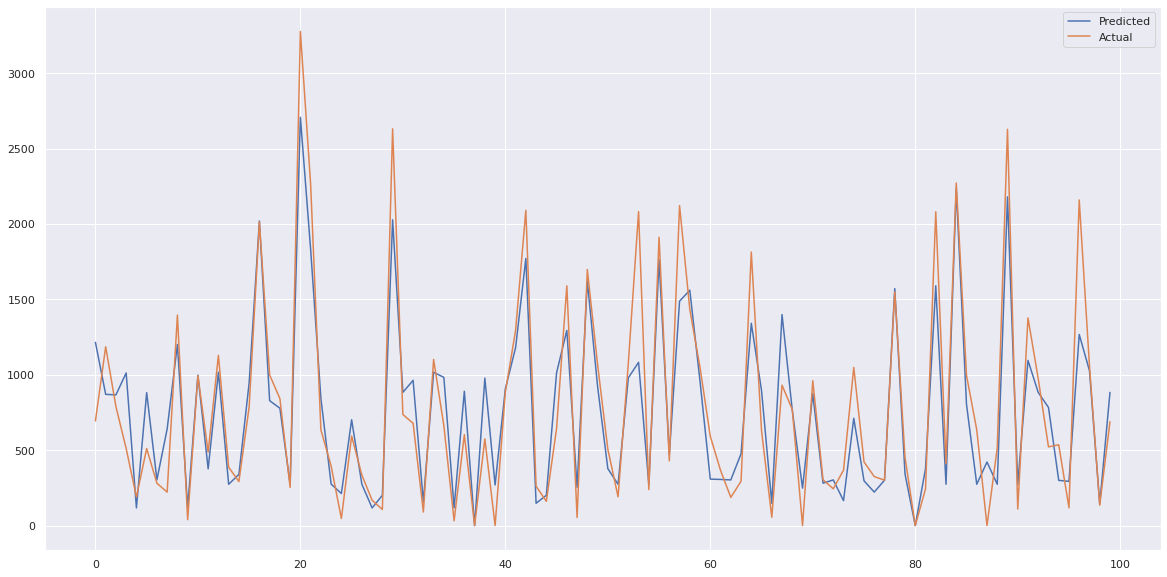

In [117]:
plt.figure(figsize=(20,10))
plt.plot(Y_pred_rf[:100])
plt.plot(np.array(Y_test[:100]))
plt.legend(["Predicted","Actual"])
plt.show()

Plot the variable importance

In [118]:
features = X_train.columns
importances = rfc.feature_importances_
indices = np.argsort(importances)

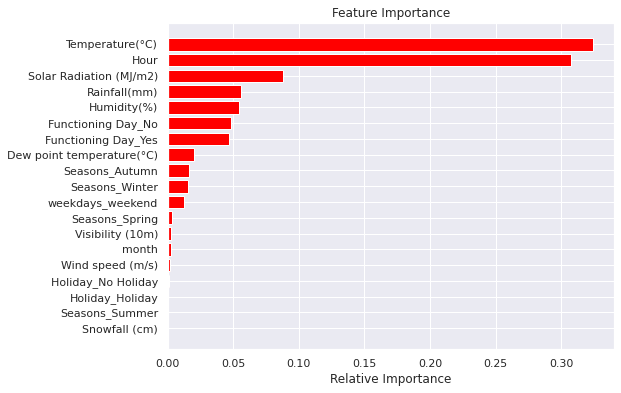

In [119]:
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='red', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

In [120]:
pip install lime

In [121]:
# LIME SECTION
import lime
import lime.lime_tabular

In [122]:
feature_names =list(X_train.columns)
cat_columns=list(categorical_features.columns)
feature_names_cat=list(categorical_feature.columns)

In [123]:
# Create the LIME Explainer
explainer = lime.lime_tabular.LimeTabularExplainer(X_train.values,feature_names=feature_names,
                                                   categorical_features=cat_columns,
                                                   categorical_names=feature_names_cat, 
                                                   mode='regression')
choosen_instance = X_test.reset_index(drop=True).loc[[2]].values[0]
exp = explainer.explain_instance(choosen_instance, rfc.predict, num_features=8)

In [124]:
exp.show_in_notebook(show_table=True)

## implimenting grid search random forest
---

In [125]:
rfc=RandomForestRegressor()

In [126]:
grid_values_rf = {'n_estimators': [80, 100,120],'max_depth': [13,15,17,19],'max_leaf_nodes':[20,40,60]}

In [127]:
rfc_grid = GridSearchCV(estimator=rfc,param_grid = grid_values_rf, scoring='neg_mean_squared_error',cv=5)

In [128]:
rfc_grid.fit(X_train,Y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [129]:
rfc_grid.score(X_train,Y_train)

-47794.47805818292

In [130]:
rfc_grid.best_params_

{'max_depth': 13, 'max_leaf_nodes': 60, 'n_estimators': 80}

In [131]:
train_class_preds_rfc = rfc_grid.predict(X_train)
test_class_preds_rfc = rfc_grid.predict(X_test)

In [132]:
MSE  = mean_squared_error(Y_test,test_class_preds_rfc)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(Y_test,test_class_preds_rfc)
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(Y_test,test_class_preds_rfc))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 62722.03975893787
RMSE : 250.44368580369095
R2 : 0.8474410882222233
Adjusted R2 :  0.846105318948593


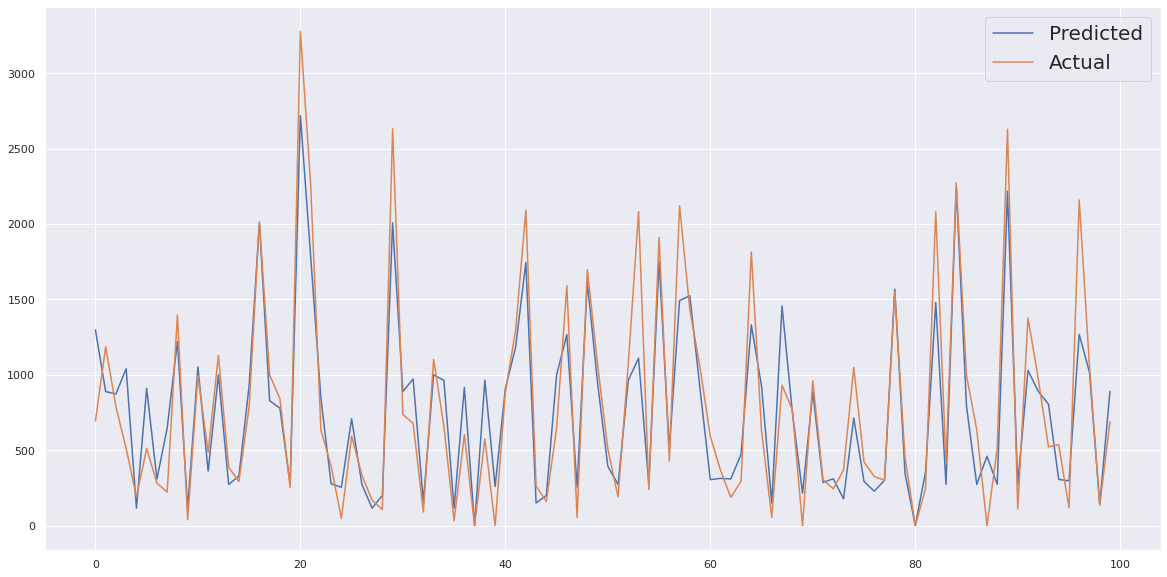

In [133]:
plt.figure(figsize=(20,10))
plt.plot(test_class_preds_rfc[:100])
plt.plot(np.array(Y_test[:100]))
plt.legend(["Predicted","Actual"],prop={'size': 20})
plt.show()

In [134]:
# Create the LIME Explainer
explainer = lime.lime_tabular.LimeTabularExplainer(X_train.values,feature_names=feature_names,
                                                   categorical_features=cat_columns,
                                                   categorical_names=feature_names_cat, 
                                                   mode='regression')
choosen_instance = X_test.reset_index(drop=True).loc[[2]].values[0]
exp = explainer.explain_instance(choosen_instance, rfc_grid.predict, num_features=8)

In [135]:
value_to_interpret=2

In [136]:
choosen_instance = X_test.reset_index(drop=True).loc[[value_to_interpret]].values[0]
exp = explainer.explain_instance(choosen_instance, rfc_grid.predict, num_features=8)

In [137]:
exp.show_in_notebook(show_table=True)

## BayesSearchCV
---

In [138]:
pip install scikit-optimize

In [139]:
grid_values_bs = {'bootstrap': [True, False],
                  'max_depth': [10,12,14,16],
                  'max_features': ['auto', 'sqrt'],
                  'min_samples_leaf': [1, 2, 4],
                  'min_samples_split': [2, 5, 10],
                  'n_estimators': [60,80,100,120,140]}


In [140]:
from skopt import BayesSearchCV
opt = BayesSearchCV(RandomForestRegressor(random_state=42),
                    grid_values_bs,
                    n_iter=32,
                    cv=5,
                    scoring='neg_mean_squared_error')
opt.fit(X_train, Y_train)

print("val. score: %s" % opt.best_score_)
print("test score: %s" % opt.score(X_test, Y_test))

val. score: -43815.8950311492
test score: -45231.979337850134


In [141]:
opt.best_params_

OrderedDict([('bootstrap', True),
             ('max_depth', 16),
             ('max_features', 'auto'),
             ('min_samples_leaf', 2),
             ('min_samples_split', 2),
             ('n_estimators', 80)])

OrderedDict([('bootstrap', True),
             ('max_depth', 14),
             ('max_features', 'auto'),
             ('min_samples_leaf', 2),
             ('min_samples_split', 5),
             ('n_estimators', 80)])

In [142]:
opt.score(X_train,Y_train)

-10458.154185771584

In [143]:
Y_opt_pred=opt.predict(X_test)

In [144]:
score_metrix(Y_test,Y_opt_pred)

MSE : 45231.979337850134
RMSE : 212.6781120328327
R2 : 0.889982188528013
Adjusted R2 :  0.8890188989344795


In [145]:
MSE  = mean_squared_error(Y_test,Y_opt_pred)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(Y_test,Y_opt_pred)
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(Y_test,Y_opt_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 45231.979337850134
RMSE : 212.6781120328327
R2 : 0.889982188528013
Adjusted R2 :  0.8890188989344795


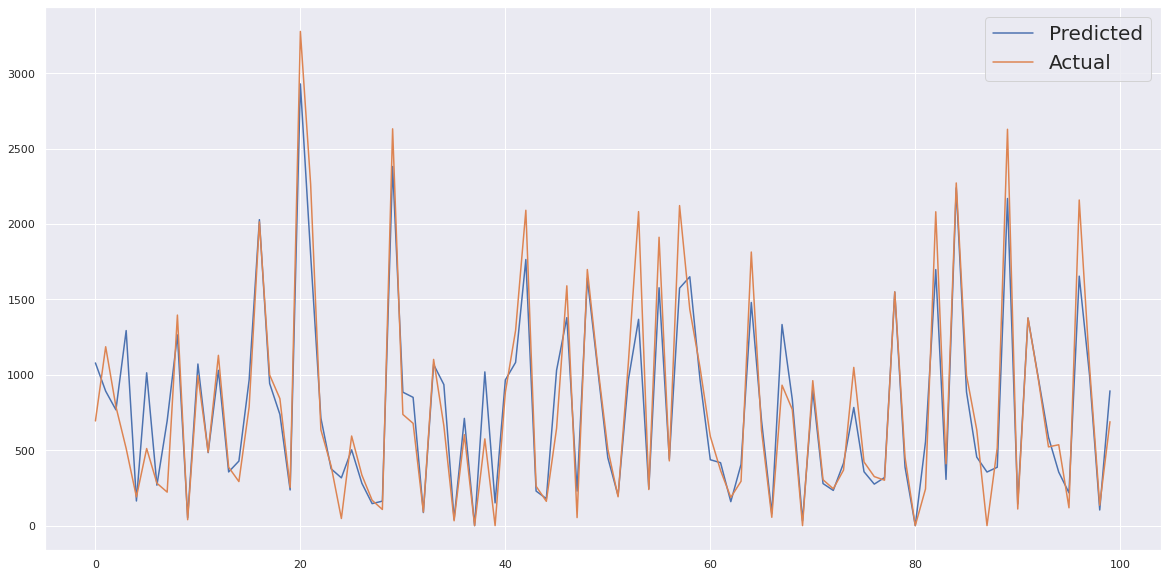

In [146]:
plt.figure(figsize=(20,10))
plt.plot(Y_opt_pred[:100])
plt.plot(np.array(Y_test[:100]))
plt.legend(["Predicted","Actual"],prop={'size': 20})
plt.show()

In [147]:
# Create the LIME Explainer
explainer = lime.lime_tabular.LimeTabularExplainer(X_train.values,feature_names=feature_names,
                                                   categorical_features=cat_columns,
                                                   categorical_names=feature_names_cat, 
                                                   mode='regression')


In [148]:
value_to_interpret=2

In [149]:
choosen_instance = X_test.reset_index(drop=True,).loc[[value_to_interpret]].values[0]
exp = explainer.explain_instance(choosen_instance, opt.predict, num_features=8)

In [150]:
X_test.reset_index(drop=True).loc[[2]]

Seasons_Autumn  Seasons_Spring  ...  month  weekdays_weekend
2               0               1  ...      4                 0

[1 rows x 19 columns]

In [151]:
exp.show_in_notebook(show_table=True)

---
#XGboost
---

learning_rate: step size shrinkage used to prevent overfitting. Range is [0,1]

max_depth: determines how deeply each tree is allowed to grow during any boosting round.

subsample: percentage of samples used per tree. Low value can lead to underfitting.

colsample_bytree: percentage of features used per tree. High value can lead to overfitting.

n_estimators: number of trees you want to build.

objective: determines the loss function to be used like reg:linear for regression problems, reg:logistic for classification problems with only decision, binary:logistic for classification problems with probability.

XGBoost also supports regularization parameters to penalize models as they become more complex and reduce them to simple (parsimonious) models.

gamma: controls whether a given node will split based on the expected reduction in loss after the split. A higher value leads to fewer splits. Supported only for tree-based learners.

alpha: L1 regularization on leaf weights. A large value leads to more regularization.

lambda: L2 regularization on leaf weights and is smoother than L1 regularization.

In [152]:
from xgboost import XGBRegressor

OrderedDict([('bootstrap', True),
             ('max_depth', 14),
             ('max_features', 'auto'),
             ('min_samples_leaf', 1),
             ('min_samples_split', 5),
             ('n_estimators', 80)])

In [153]:
xgbr=XGBRegressor( learning_rate = 0.1,max_depth = 15, alpha = 10, n_estimators = 80,verbosity=0)

In [154]:
xgbr.fit(X_train,Y_train)

XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=15, min_child_weight=1, missing=None, n_estimators=80,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=0)

In [155]:
xgbr.score(X_train,Y_train)

0.9998905459194231

In [156]:
xgbr.score(X_test,Y_test)

0.9230429320105589

In [157]:
Y_pred_xhbr=xgbr.predict(X_test)

In [158]:
score_metrix(Y_test,Y_pred_xhbr)

MSE : 11.788522879358002
RMSE : 3.433441841557536
R2 : 0.923042932010559
Adjusted R2 :  0.922404872487846


In [159]:
xgb_param={'n_estimators': [50,100,150,200],'max_depth': [8,10,15,20]}

In [160]:
xgb_grid=GridSearchCV(estimator=xgbr,param_grid=xgb_param,cv=5,scoring='neg_mean_squared_error',verbose=0,n_jobs=-1)

In [161]:
xgb_grid.fit(X_train,Y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=XGBRegressor(alpha=10, base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0,
                                    importance_type='gain', learning_rate=0.1,
                                    max_delta_step=0, max_depth=15,
                                    min_child_weight=1, missing=None,
                                    n_estimators=80, n_jobs=1, nthread=None,
                                    objective='reg:linear', random_state=0,
                                    reg_alpha=0, reg_lambda=1,
                                    scale_pos_weight=1, seed=None, silent=None,
                                    subsample=1, verbosity=0),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_depth': [8, 10, 15, 20],
                         'n_estimators': [50, 100, 150, 200]},
      

In [162]:
xgb_grid.best_params_

{'max_depth': 8, 'n_estimators': 200}

In [163]:
Y_pred_xgb=xgb_grid.predict(X_test)

In [164]:
score_metrix(Y_test,Y_pred_xgb)

MSE : 12.181691631743506
RMSE : 3.4902280200215436
R2 : 0.9204762733444731
Adjusted R2 :  0.9198169333722025


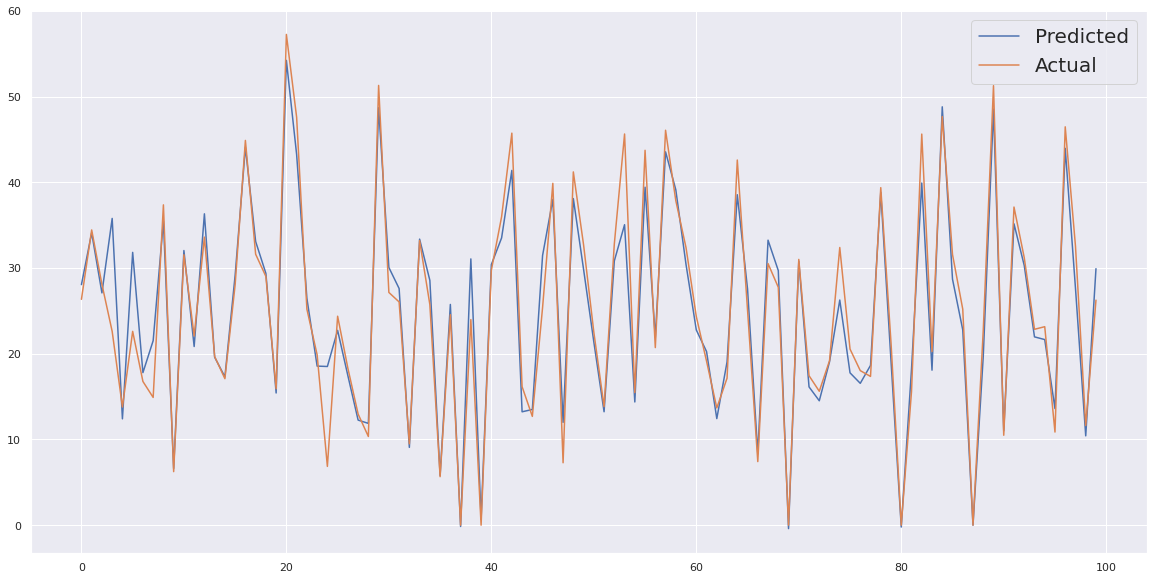

In [165]:
plt.figure(figsize=(20,10))
plt.plot(Y_pred_xgb[:100])
plt.plot(np.array(Y_test[:100]))
plt.legend(["Predicted","Actual"],prop={'size': 20})
plt.show()

In [166]:
xgb_grid.get_params

<bound method BaseEstimator.get_params of GridSearchCV(cv=5, error_score=nan,
             estimator=XGBRegressor(alpha=10, base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0,
                                    importance_type='gain', learning_rate=0.1,
                                    max_delta_step=0, max_depth=15,
                                    min_child_weight=1, missing=None,
                                    n_estimators=80, n_jobs=1, nthread=None,
                                    objective='reg:linear', random_state=0,
                                    reg_alpha=0, reg_lambda=1,
                                    scale_pos_weight=1, seed=None, silent=None,
                                    subsample=1, verbosity=0),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_depth': [8, 10, 15, 20],
                         'n

Plot the variable importance

In [167]:
features = X_train.columns
importances = xgbr.feature_importances_
indices = np.argsort(importances)

AttributeError: ignored

In [ ]:
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='red', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

In [ ]:
# Create the LIME Explainer
explainer = lime.lime_tabular.LimeTabularExplainer(X_train.values,feature_names=feature_names,
                                                   categorical_features=cat_columns,
                                                   categorical_names=feature_names_cat, 
                                                   mode='regression')

In [ ]:
value_to_interpret=2

In [ ]:
# choosen_instance = X_test.reset_index(drop=True).loc[[value_to_interpret]].values[0]
# exp = explainer.explain_instance(choosen_instance, xgb_grid.predict, num_features=8)

In [ ]:
# exp.show_in_notebook(show_table=True)

---
# Gbm
---

In [92]:
from sklearn.ensemble import GradientBoostingRegressor

In [93]:
gbm=GradientBoostingRegressor(learning_rate=0.2,n_estimators=50,min_samples_split=500,min_samples_leaf = 50,max_depth = 8,max_features = 'sqrt',subsample = 0.8 )

In [94]:
gbm.fit(X_train,Y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.2, loss='ls', max_depth=8,
                          max_features='sqrt', max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=50, min_samples_split=500,
                          min_weight_fraction_leaf=0.0, n_estimators=50,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=0.8, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [95]:
gbm.score(X_train,Y_train)


0.9099654593414002

In [96]:
Y_pred_gbm=gbm.predict(X_test)

In [97]:
score_metrix(Y_test,Y_pred_gbm)

MSE : 16.88144259017576
RMSE : 4.108703273561594
R2 : 0.8897956649474007
Adjusted R2 :  0.8888819486733579


In [98]:
gbm=GradientBoostingRegressor(learning_rate=0.1, min_samples_split=500,min_samples_leaf=50,max_depth=8,max_features='sqrt',subsample=0.8,random_state=10)

In [108]:
param_test1 = {'n_estimators': [140,160,180,200],'max_depth': [15,20,30],'alpha':[0.1,1,10]}

In [109]:
gbm_grid = GridSearchCV(estimator=gbm,param_grid = param_test1, scoring='neg_mean_squared_error',verbose=0, cv=5,n_jobs=-1)

In [110]:
gbm_grid.fit(X_train,Y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=8,
                                                 max_features='sqrt',
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=50,
                                                 min_samples_split=500,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100,
                                                 n_iter_no_change=None,
            

In [111]:
gbm_grid.score(X_train,Y_train)

-9.507717329104883

In [112]:
gbm_grid.best_params_

{'alpha': 0.1, 'max_depth': 30, 'n_estimators': 200}

In [113]:
Y_pred_gbm_grid=gbm_grid.predict(X_test)

In [114]:
score_metrix(Y_test,Y_pred_gbm_grid)

MSE : 14.121147582150893
RMSE : 3.7578115415958386
R2 : 0.9078152432081721
Adjusted R2 :  0.90705092924122
